<a href="https://colab.research.google.com/github/simon-mellergaard/datavis/blob/main/Experiments/seaborn_exp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Formatting for the raw dataset. This notebook should be made to a .py file later.

**COLAB CODE**

The below code will clone the repository into the colab environment. It should only be run if using the colab environment, though it should not matter if running it in another environment. 

In [6]:
import os
import sys
if 'google.colab' in sys.modules:
    %cd /content/
    # remove local directory if it already exists
    if os.path.isdir("datavis"):
        !rm -rf {"datavis"}
    !git clone https://github.com/simon-mellergaard/datavis.git
    %cd /content/datavis/Experiments

# Preprocessing

Preprocessing script:

In [7]:
import pandas as pd
# Import data
df_raw = pd.read_csv('../Data/UFM_samlet_29JUN2025.csv', sep=';', header=0, encoding='latin-1')

# df_raw_join = df_raw.copy()
# df_raw_join['join'] = str(df_raw_join['udbud_id'], df_raw_join['Titel'])

# # Read an excel file
# df_quotients = pd.read_excel('DATA_UFM_combined.xlsx', header=0)

# Join the two dataframes on udbud_id. The number of rows should be unchanged.
# df_raw_2 = pd.merge(df_raw, df_quotients, on='udbud_id', how='left')

# Columns to keep
cols = [
    'udbud_id',
    'Titel',
    'Educational_Category',
    'displaydocclass',
    'hovedinsttx',
    'instregiontx',
    'instkommunetx',
    'arbejdstid_timer',
    'arbmedstud_likert',
    'ensom_likert',
    'maanedloen_10aar',
    'maanedloen_nyudd',
    'tidsforbrug_p50',
]



data = df_raw[cols]

# Replace all , with . and convert to numeric
data['ensom_likert'] = pd.to_numeric(data['ensom_likert'].str.replace(',', '.'))
data['arbmedstud_likert'] = pd.to_numeric(data['arbmedstud_likert'].str.replace(',', '.'))
data['tidsforbrug_p50'] = pd.to_numeric(data['tidsforbrug_p50'].str.replace(',', '.'))

# multiply maanedloen_10aar and maanedloen_nyudd by 1000
data['maanedloen_10aar'] = round(data['maanedloen_10aar'] * 1000)
data['maanedloen_nyudd'] = round(data['maanedloen_nyudd'] * 1000)

# Remove all udbud_id==999999, as this is the education on national level
data_whole_edu = data[data['udbud_id'] == 999999]
data = data[data['udbud_id'] != 999999]

# Remove the udbud_id column
data = data.drop(columns=['udbud_id'])

data_na = data.copy()
# Remove all rows with missing values
data = data.dropna()

C:\Users\simon\AppData\Local\Temp\ipykernel_71676\1381812620.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['ensom_likert'] = pd.to_numeric(data['ensom_likert'].str.replace(',', '.'))
C:\Users\simon\AppData\Local\Temp\ipykernel_71676\1381812620.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['arbmedstud_likert'] = pd.to_numeric(data['arbmedstud_likert'].str.replace(',', '.'))
C:\Users\simon\AppData\Local\Temp\ipykernel_71676\1381812620.py:38: SettingWithCopyWarning: 
A value is trying t

In [8]:
data

,Titel,Educational_Category,displaydocclass,hovedinsttx,instregiontx,instkommunetx,arbejdstid_timer,arbmedstud_likert,ensom_likert,maanedloen_10aar,maanedloen_nyudd,tidsforbrug_p50
8,Administrationsøkonom,Erhvervsakademiuddannelser,Erhvervsakademiuddannelse,Zealand Sjællands Erhvervsakademi,Sjælland,Køge,37.0,4.13,4.17,37000.0,32300.0,36.0
11,Psykomotorisk terapeut,Professionsbacheloruddannelser,Professionsbacheloruddannelse,Københavns Professionshøjskole,Hovedstaden,Hillerød,34.0,3.88,3.70,24700.0,32400.0,40.0
19,Automationsteknolog,Erhvervsakademiuddannelser,Erhvervsakademiuddannelse,Professionshøjskolen University College Nordjy...,Nordjylland,Aalborg,38.0,4.09,3.84,48250.0,41650.0,41.0
38,Bioanalytiker,Professionsbacheloruddannelser,Professionsbacheloruddannelse,Københavns Professionshøjskole,Hovedstaden,København,37.0,3.81,3.65,38500.0,32300.0,39.0
41,Bioanalytiker,Professionsbacheloruddannelser,Professionsbacheloruddannelse,Professionshøjskolen UC Syddanmark,Syddanmark,Esbjerg,38.0,3.96,3.95,36600.0,31000.0,42.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2086,Politik og forvaltning,Universitetsuddannelser,Kandidatuddannelse,Roskilde Universitet,Sjælland,Roskilde,39.0,3.69,3.19,54600.0,37900.0,29.0
2088,Samfundsvidenskabelig jura,Universitetsuddannelser,Kandidatuddannelse,Københavns Universitet,Hovedstaden,København,39.0,3.85,3.85,47600.0,41700.0,31.5
2094,Socialvidenskab,Universitetsuddannelser,Kandidatuddannelse,Roskilde Universitet,Sjælland,Roskilde,36.0,4.10,3.79,48600.0,36250.0,30.0
2098,Tværvidenskabelige sundhedsstudier,Universitetsuddannelser,Kandidatuddannelse,Roskilde Universitet,Sjælland,Roskilde,37.0,4.24,3.88,47300.0,36600.0,37.5


In [9]:
df_raw

,artikel_id,udbud_id,url,udd6,Titel,Educational_Category,displaydocclass,kaldenavn,hovedinst,hovedinsttx,...,hyppigsteid2,hyppigsteid3,hyppigstepct1,hyppigstepct2,hyppigstepct3,hyppigstetx1,hyppigstetx2,hyppigstetx3,hyppigste_statusaar,hyppigste_n
0,udb-faergenavigatoer,443401,www.ug.dk/uddannelser/andreerhvervsrettedeudda...,201900,Færgenavigatør,Andre uddannelser,Andre uddannelser,NaN,443401,Marstal Navigationsskole,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ingen data,NaN
1,udb-faergenavigatoer,999999,www.ug.dk/uddannelser/andreerhvervsrettedeudda...,201900,Færgenavigatør,Andre uddannelser,Andre uddannelser,NaN,999999,Uddannelsen på landsplan,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ingen data,NaN
2,udb2-VVSinstallatoer,101616,www.ug.dk/uddannelser/erhvervsakademiuddannels...,516300,VVS-installatør,Erhvervsakademiuddannelser,Erhvervsakademiuddannelse,NaN,101604,Københavns Erhvervsakademi (KEA),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ingen data,NaN
3,udb2-VVSinstallatoer,259408,www.ug.dk/uddannelser/erhvervsakademiuddannels...,516300,VVS-installatør,Erhvervsakademiuddannelser,Erhvervsakademiuddannelse,NaN,259404,Zealand Sjællands Erhvervsakademi,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ingen data,NaN
4,udb2-VVSinstallatoer,461453,www.ug.dk/uddannelser/erhvervsakademiuddannels...,516300,VVS-installatør,Erhvervsakademiuddannelser,Erhvervsakademiuddannelse,NaN,630401,UCL Erhvervsakademi og Professionshøjskole,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ingen data,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2144,ug2-ea-elinstallatør,730404,www.ug.dk/uddannelser/erhvervsakademiuddannels...,"516200, 513200",Elinstallatør,Erhvervsakademiuddannelser,Erhvervsakademiuddannelse,NaN,730401,Erhvervsakademi Dania,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ingen data,NaN
2145,ug2-ea-elinstallatør,281741,www.ug.dk/uddannelser/erhvervsakademiuddannels...,"516200, 513200",Elinstallatør,Erhvervsakademiuddannelser,Erhvervsakademiuddannelse,NaN,851454,Professionshøjskolen University College Nordjy...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ingen data,NaN
2146,ug2-ea-elinstallatør,999999,www.ug.dk/uddannelser/erhvervsakademiuddannels...,"516200, 513200",Elinstallatør,Erhvervsakademiuddannelser,Erhvervsakademiuddannelse,NaN,999999,Uddannelsen på landsplan,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ingen data,NaN
2147,ug2-kandidatichoreography,280591,www.ug.dk/uddannelser/bachelorogkandidatuddann...,589762,Choreography,Universitetsuddannelser,Kandidatuddannelse,NaN,101518,Den Danske Scenekunstskole,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ingen data,NaN


In [10]:
for col in df_raw.columns:
    print(col)

artikel_id
udbud_id
url
udd6
Titel
Educational_Category
displaydocclass
kaldenavn
hovedinst
hovedinsttx
instkommune
instkommunetx
instregion
instregiontx
afbrud_statusaar
afbrud_n
afbrud
afbrud_aggr
timetal_statusaar
timetal_OfSupervision
timetal_WithFewStudents
timetal_WithManyStudents
branche_statusaar
branche_n
branchepct1
branchepct2
branchepct3
branchepct4
branchetxt1
branchetxt2
branchetxt3
branchetxt4
offt_privat
ledighed_nyudd_statusaar
ledighed_nyudd_n
ledighed_nyudd
ledighed_nyudd_aggr
maanedloen_nyudd_statusaar
maanedloen_nyudd_n
maanedloen_nyudd
maanedloenp25_nyudd
maanedloenp75_nyudd
maanedloen_nyudd_aggr
ledighed_10aar_statusaar
ledighed_10aar_n
ledighed_10aar
ledighed_10aar_aggr
maanedloen_10aar_statusaar
maanedloen_10aar_n
maanedloen_10aar
maanedloenp25_10aar
maanedloenp75_10aar
maanedloen_10aar_aggr
studbesvarelser_antal
studbesvarelser_pct
fagligmiljo_statusaar
fagligmiljo_n
fagligmiljo_ntotal
fagligmiljo_likert
arbmedstud_statusaar
arbmedstud_n
arbmedstud_ntotal
arbm

# Visualization

c:\Users\simon\OneDrive\Dokumenter\Codes\Python_codes\datavis\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 150 (\x96) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


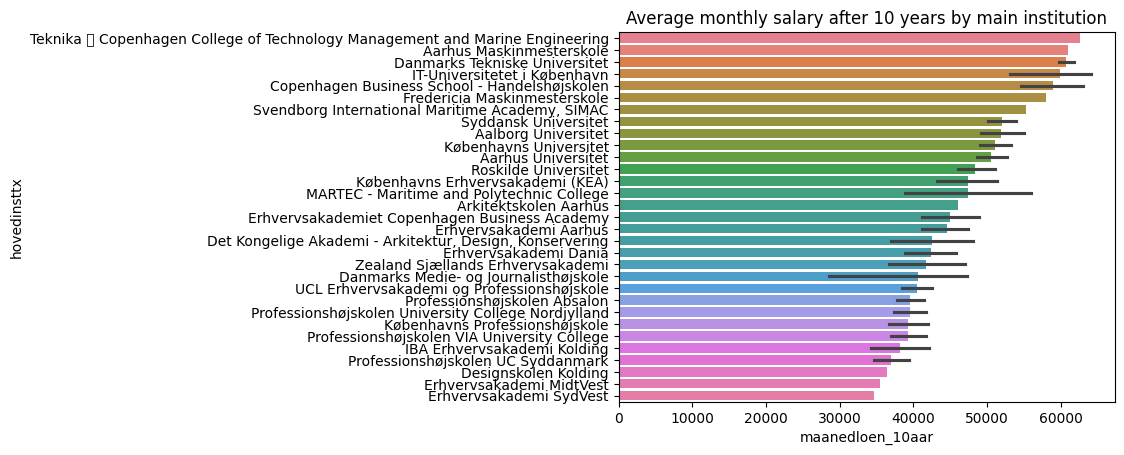

In [14]:
# Visualize the maanedloen_10aar against hovedinsttx
import matplotlib.pyplot as plt
import seaborn as sns
# make a barplot
sns.barplot(y='hovedinsttx', x='maanedloen_10aar', data=data, hue='hovedinsttx', order=data.groupby('hovedinsttx')['maanedloen_10aar'].mean().sort_values(ascending=False).index,
            hue_order=data.groupby('hovedinsttx')['maanedloen_10aar'].mean().sort_values(ascending=False).index)
plt.title('Average monthly salary after 10 years by main institution')
plt.show()

c:\Users\simon\OneDrive\Dokumenter\Codes\Python_codes\datavis\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 150 (\x96) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


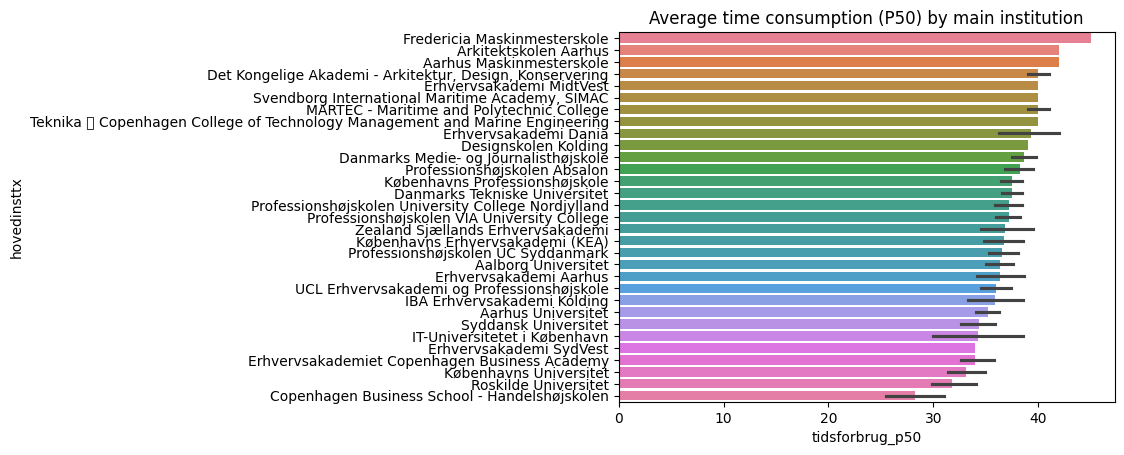

In [15]:
# Visualize the tidsforbrug_p50 against hovedinsttx
import matplotlib.pyplot as plt
import seaborn as sns
# make a barplot
sns.barplot(y='hovedinsttx', x='tidsforbrug_p50', data=data, hue='hovedinsttx', order=data.groupby('hovedinsttx')['tidsforbrug_p50'].mean().sort_values(ascending=False).index,
            hue_order=data.groupby('hovedinsttx')['tidsforbrug_p50'].mean().sort_values(ascending=False).index)
plt.title('Average time consumption (P50) by main institution')
plt.show()

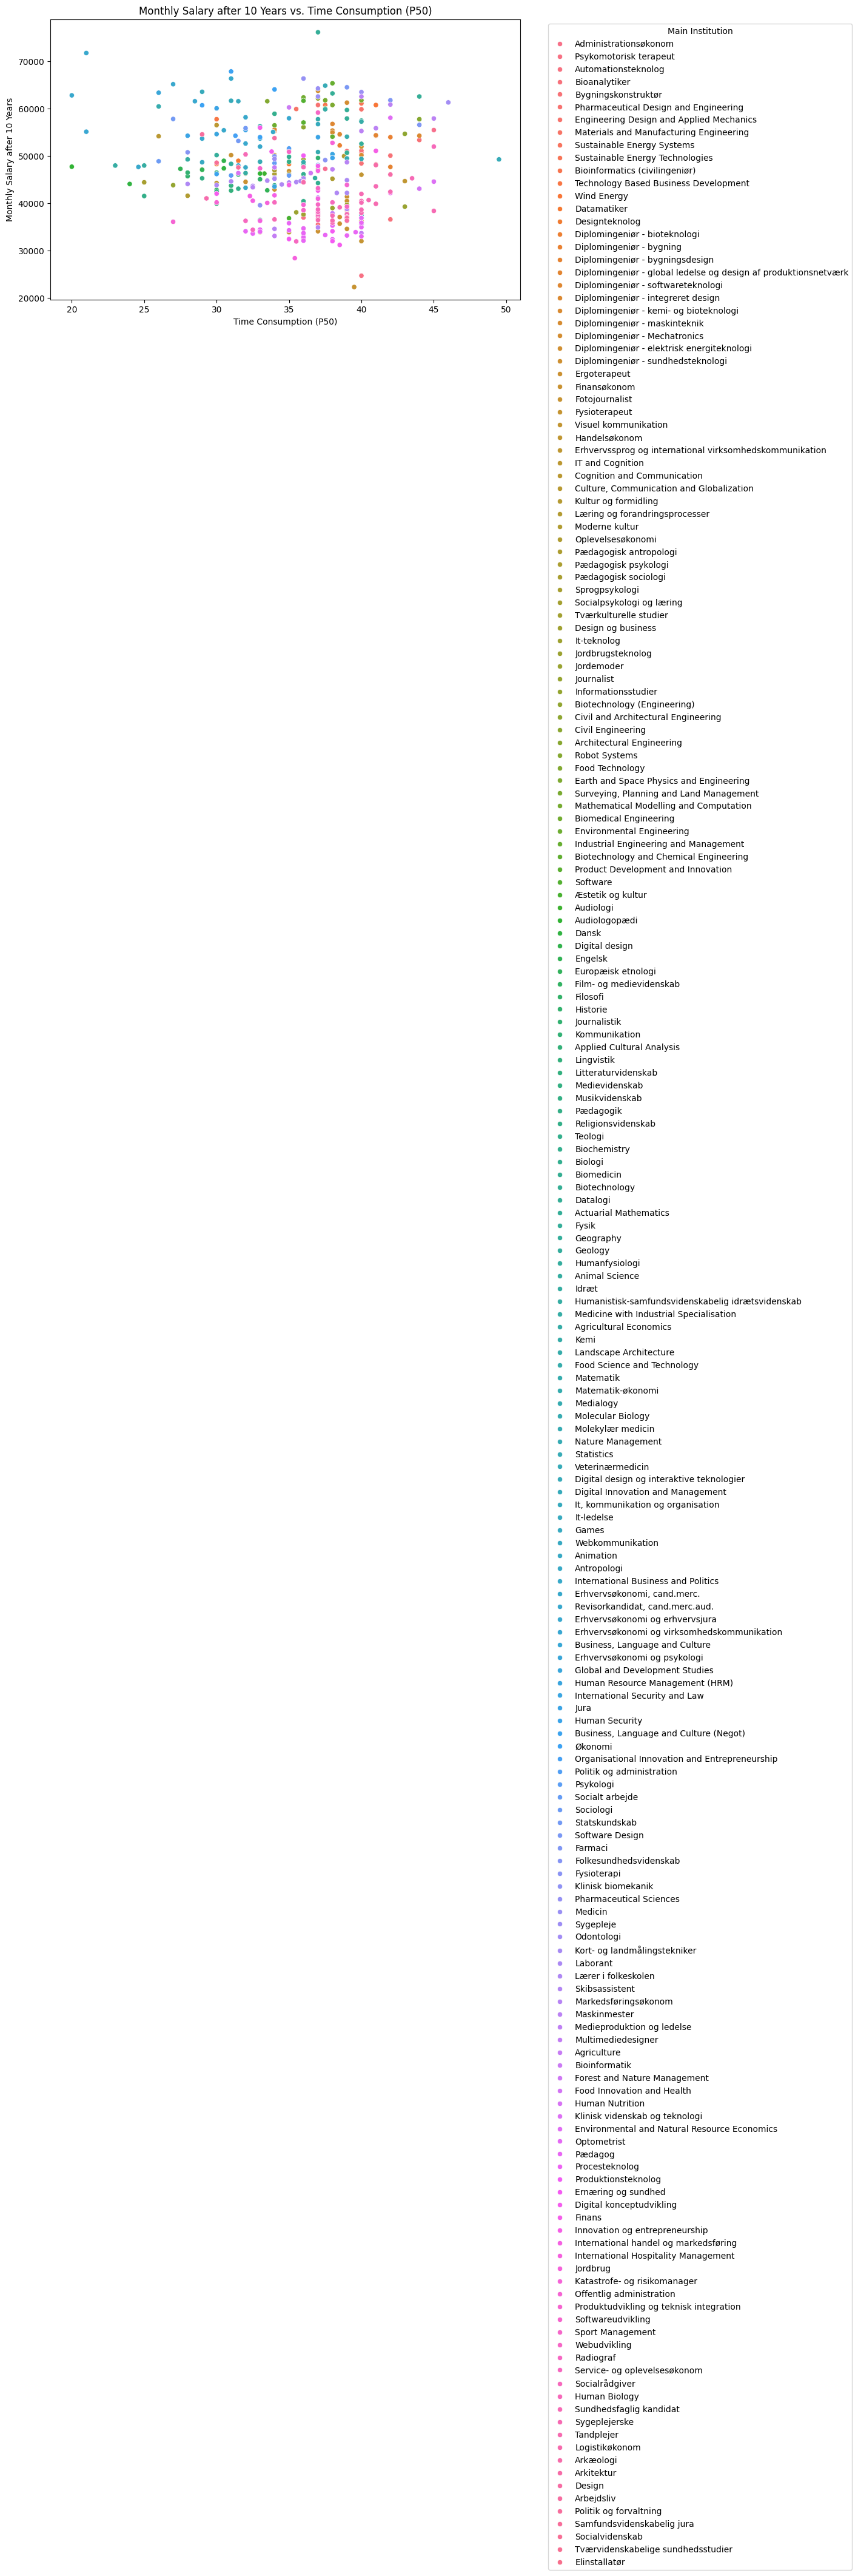

In [16]:
# Scatterplot of maanedloen_10aar against tidsforbrug_p50
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='tidsforbrug_p50', y='maanedloen_10aar', hue='Titel')
plt.title('Monthly Salary after 10 Years vs. Time Consumption (P50)')
plt.xlabel('Time Consumption (P50)')
plt.ylabel('Monthly Salary after 10 Years')
plt.legend(title='Main Institution', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [17]:
# Select the 10 most earning titles based on maanedloen_10aar
top_10_titles = data.groupby('Titel')['maanedloen_10aar'].mean().sort_values(ascending=False).head(10).index
top_10_data = data[data['Titel'].isin(top_10_titles)]
top_10_data

,Titel,Educational_Category,displaydocclass,hovedinsttx,instregiontx,instkommunetx,arbejdstid_timer,arbmedstud_likert,ensom_likert,maanedloen_10aar,maanedloen_nyudd,tidsforbrug_p50
335,Diplomingeniør - elektrisk energiteknologi,Professionsbacheloruddannelser,Professionsbacheloruddannelse,Aarhus Universitet,Midtjylland,Aarhus,39.0,4.16,3.80,63800.0,44350.0,37.0
741,Industrial Engineering and Management,Universitetsuddannelser,Kandidatuddannelse,Danmarks Tekniske Universitet,Hovedstaden,Lyngby-Taarbæk,40.0,4.21,3.50,65400.0,47400.0,38.0
970,Actuarial Mathematics,Universitetsuddannelser,Kandidatuddannelse,Københavns Universitet,Hovedstaden,København,38.0,4.36,3.79,76200.0,56100.0,37.0
1054,Statistics,Universitetsuddannelser,Kandidatuddannelse,Københavns Universitet,Hovedstaden,København,38.0,4.15,3.33,64900.0,42100.0,37.5
1073,Digital Innovation and Management,Universitetsuddannelser,Kandidatuddannelse,IT-Universitetet i København,Hovedstaden,København,39.0,4.35,3.86,63600.0,44000.0,29.0
1116,"Revisorkandidat, cand.merc.aud.",Universitetsuddannelser,Kandidatuddannelse,Copenhagen Business School - Handelshøjskolen,Hovedstaden,Frederiksberg,43.0,3.58,3.75,71800.0,51500.0,21.0
1117,"Revisorkandidat, cand.merc.aud.",Universitetsuddannelser,Kandidatuddannelse,Syddansk Universitet,Syddanmark,Kolding,41.0,3.58,3.67,62850.0,43050.0,20.0
1118,"Revisorkandidat, cand.merc.aud.",Universitetsuddannelser,Kandidatuddannelse,Aarhus Universitet,Midtjylland,Aarhus,42.0,3.97,4.09,65200.0,39900.0,27.0
1119,"Revisorkandidat, cand.merc.aud.",Universitetsuddannelser,Kandidatuddannelse,Aalborg Universitet,Nordjylland,Aalborg,41.0,3.73,3.17,52650.0,42550.0,32.0
1145,Erhvervsøkonomi og psykologi,Universitetsuddannelser,Kandidatuddannelse,Copenhagen Business School - Handelshøjskolen,Hovedstaden,Frederiksberg,39.0,3.84,3.48,63400.0,41400.0,26.0


In [18]:
# Select all numerical columns
numerical_cols = [col for col in data.columns if data[col].dtype != 'object']

data_titles = data.groupby('Titel')[numerical_cols].mean()

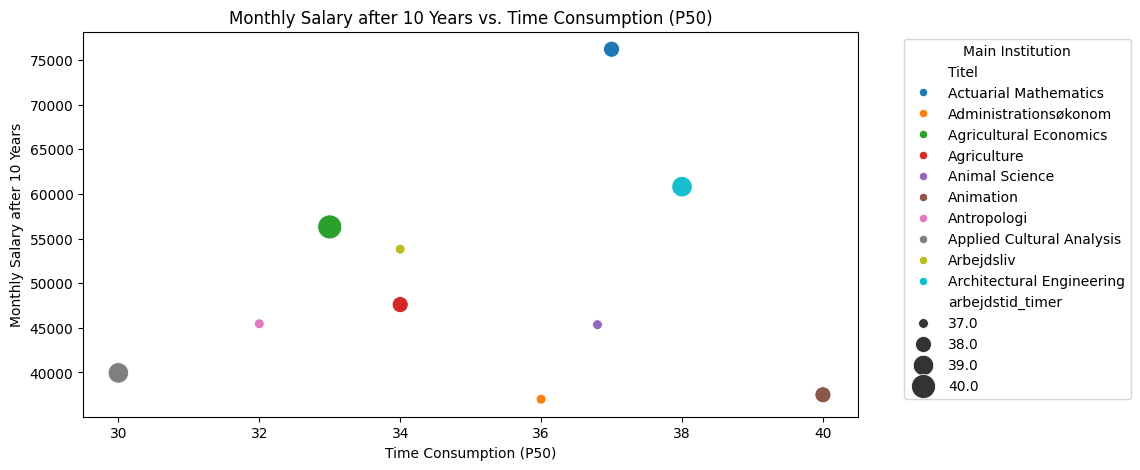

In [19]:
# Scatterplot of maanedloen_10aar against tidsforbrug_p50
plt.figure(figsize=(10, 5))
sns.scatterplot(data=data_titles.head(10), x='tidsforbrug_p50', y='maanedloen_10aar', hue='Titel', size='arbejdstid_timer', sizes=(50, 300))
plt.title('Monthly Salary after 10 Years vs. Time Consumption (P50)')
plt.xlabel('Time Consumption (P50)')
plt.ylabel('Monthly Salary after 10 Years')
plt.legend(title='Main Institution', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [20]:
data_titles

,arbejdstid_timer,arbmedstud_likert,ensom_likert,maanedloen_10aar,maanedloen_nyudd,tidsforbrug_p50
Titel,,,,,,
Actuarial Mathematics,38.0,4.360000,3.790000,76200.000000,56100.0,37.00
Administrationsøkonom,37.0,4.130000,4.170000,37000.000000,32300.0,36.00
Agricultural Economics,40.0,4.060000,3.600000,56300.000000,39600.0,33.00
Agriculture,38.0,4.020000,3.020000,47600.000000,35300.0,34.00
Animal Science,37.0,3.940000,3.240000,45350.000000,35000.0,36.80
...,...,...,...,...,...,...
Webkommunikation,37.0,3.780000,3.660000,48700.000000,35800.0,29.00
Webudvikling,37.0,3.896667,3.706667,51566.666667,33600.0,36.00
Wind Energy,39.0,4.200000,3.170000,60800.000000,43300.0,41.00


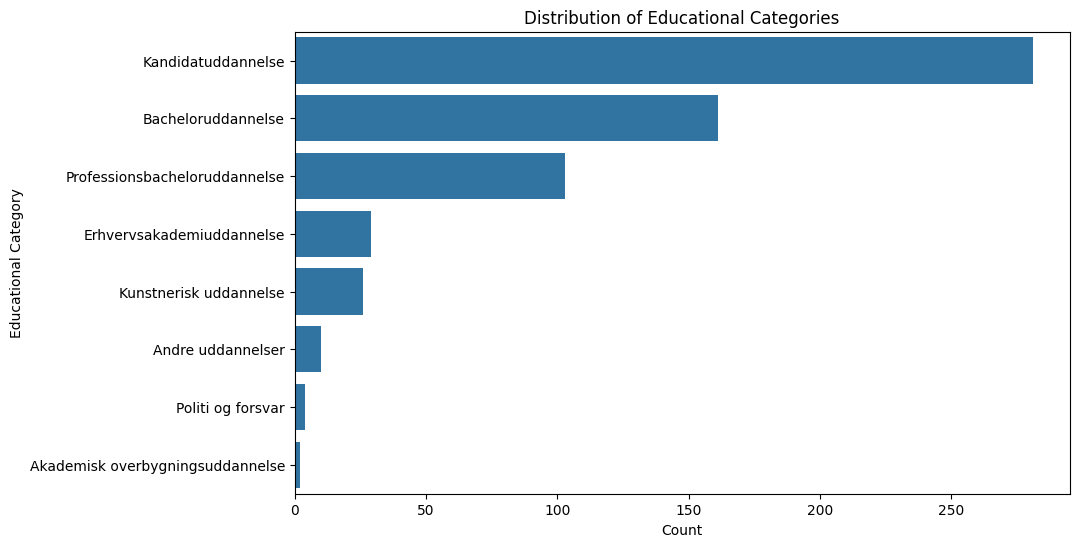

In [21]:
# Select categorical columns
edu_types = data_na.groupby('Titel')[['displaydocclass', 'Educational_Category']].first()
# Make a histogram of Educational_Category
plt.figure(figsize=(10, 6))
sns.countplot(data=edu_types, y='displaydocclass', order=edu_types['displaydocclass'].value_counts().index)
plt.title('Distribution of Educational Categories')
plt.xlabel('Count')
plt.ylabel('Educational Category')
plt.show()

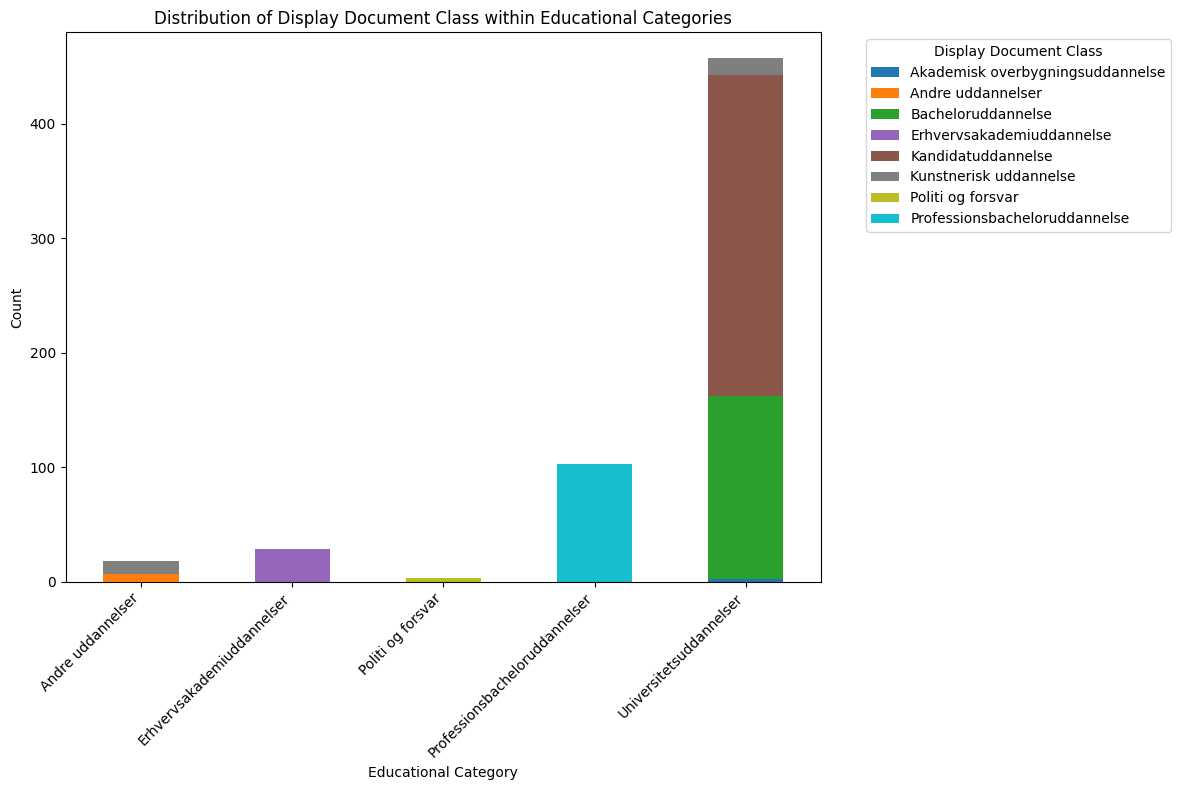

In [22]:
# Create a cross-tabulation of Educational_Category and displaydocclass
cross_tab = pd.crosstab(edu_types['Educational_Category'], edu_types['displaydocclass'])

# Make a stacked bar chart
cross_tab.plot(kind='bar', stacked=True, figsize=(12, 8), cmap='tab10')
plt.title('Distribution of Display Document Class within Educational Categories')
plt.xlabel('Educational Category')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Display Document Class', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

c:\Users\simon\OneDrive\Dokumenter\Codes\Python_codes\datavis\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 150 (\x96) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


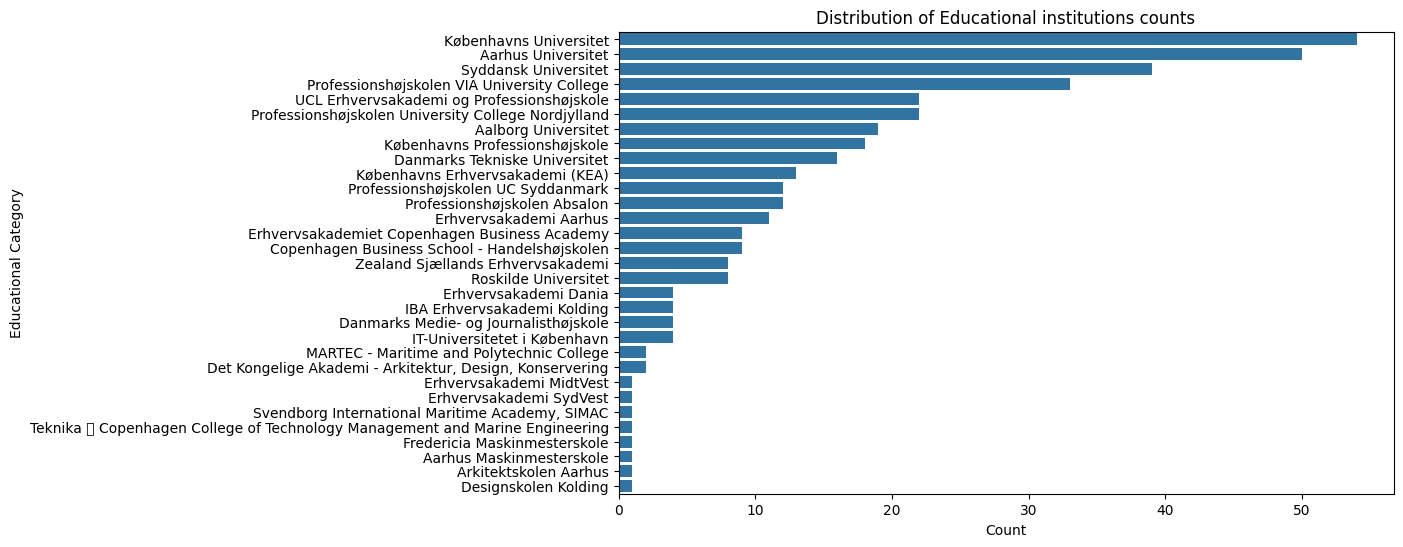

In [23]:
# Make a histogram of hovedinsttx
plt.figure(figsize=(10, 6))
sns.countplot(data=data, y='hovedinsttx', order=data['hovedinsttx'].value_counts().index)
plt.title('Distribution of Educational institutions counts')
plt.xlabel('Count')
plt.ylabel('Educational Category')
plt.show()

In [24]:
data['hovedinsttx'].value_counts()

hovedinsttx
Københavns Universitet                                                          54
Aarhus Universitet                                                              50
Syddansk Universitet                                                            39
Professionshøjskolen VIA University College                                     33
UCL Erhvervsakademi og Professionshøjskole                                      22
Professionshøjskolen University College Nordjylland                             22
Aalborg Universitet                                                             19
Københavns Professionshøjskole                                                  18
Danmarks Tekniske Universitet                                                   16
Københavns Erhvervsakademi (KEA)                                                13
Professionshøjskolen UC Syddanmark                                              12
Professionshøjskolen Absalon                                               

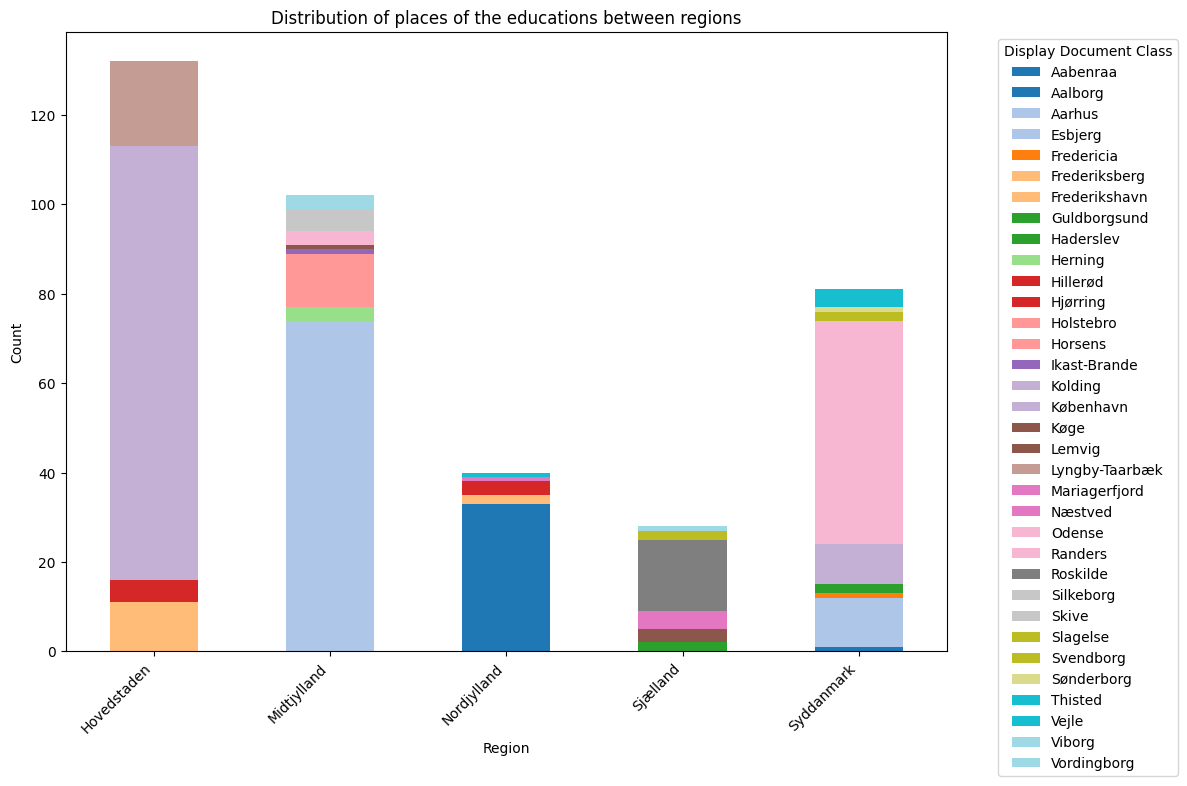

In [25]:
# Create a cross-tabulation of Educational_Category and displaydocclass
cross_tab = pd.crosstab(data['instregiontx'], data['instkommunetx'])

# Make a stacked bar chart
cross_tab.plot(kind='bar', stacked=True, figsize=(12, 8), cmap='tab20')
plt.title('Distribution of places of the educations between regions')
plt.xlabel('Region')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Display Document Class', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()